In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def ACG_sample(Sigma, num_points):
    """
    Sigma is a pxp covariance matrix 
    """
    point_dim = Sigma.shape[0]
    X = np.zeros((num_points, point_dim))
    for n in range(num_points):
        x_i = np.random.multivariate_normal(np.zeros(point_dim), Sigma)
        X[n, :] = x_i/np.linalg.norm(x_i)
    return X

def create_isotropic_covariance_matrix(p, idx):
    """
    p: dimension of the covariance matrix
    idx: which axis to concentrate around (0, 1, ..., p-1)
    """
    Sigma = np.eye(p) * 1e-6 #this value can be changed to produce smaller clusters
    Sigma[idx, idx] = 1
    Sigma = p * Sigma / np.trace(Sigma) #trace-normalize since ACG is scale-invariant
    return Sigma

In [15]:
# example point generation and visualization
num_points = 1000
p = 3 #dimensionality of data
K = 2 #number of components, should always be lower than p
X = np.zeros((K*num_points, p))
for k in range(K):
    Sigma = create_isotropic_covariance_matrix(p, k)
    X[k*num_points:(k+1)*num_points, :] = ACG_sample(Sigma, num_points)

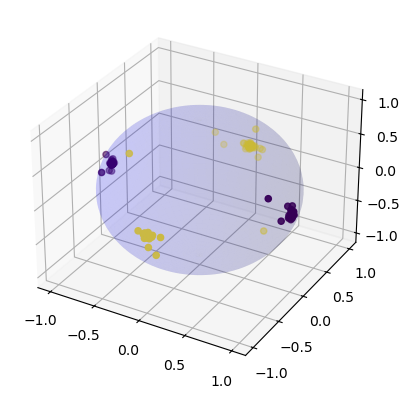

In [18]:
# visualize a sphere and the points plotted on the sphere in colors corresponding to their clustering index
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=np.arange(K).repeat(num_points), cmap='viridis')
#plot the actual sphere on top as lines, not surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

plt.show()